In [1]:
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

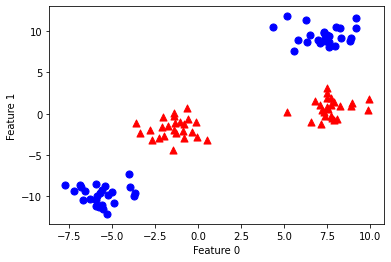

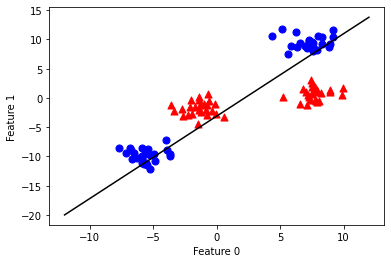

In [5]:
# %load ml02_svm_4blobs.py
import numpy as np
from sklearn.datasets import make_blobs
X, y = make_blobs( centers=4, random_state=8)
y = y%2

import matplotlib.pyplot as pl
attrs0 = {'c':'b', 's':50, 'marker':'o', 'cmap': 'pl.get_cmap("viridis")'}
attrs1 = {'c':'r', 's':50, 'marker':'^', 'cmap': 'pl.get_cmap("viridis")'}
fig,ax = pl.subplots(1,1)
ax.scatter(X[:,0][y==0], X[:,1][y==0], **attrs0)
ax.scatter(X[:,0][y==1], X[:,1][y==1], **attrs1)
ax.set_xlabel('Feature 0')
ax.set_ylabel('Feature 1')
pl.savefig('fig/02_svm_4blobs.png')
#pl.show()

from sklearn.svm import LinearSVC
lsvm = LinearSVC().fit(X,y)
coef = lsvm.coef_[0]
intercept = lsvm.intercept_[0]

fig,ax = pl.subplots(1,1)
ax.scatter(X[:,0][y==0], X[:,1][y==0], **attrs0)
ax.scatter(X[:,0][y==1], X[:,1][y==1], **attrs1)
ax.set_xlabel('Feature 0')
ax.set_ylabel('Feature 1')

x = np.linspace(-12,12)
ax.plot(x, -(x*coef[0] + intercept)/coef[1], 'k')
pl.savefig('fig/02_svm_4blobs_fit_linear.png')
pl.show()


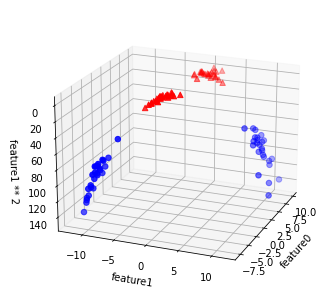

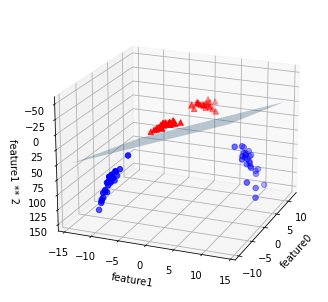

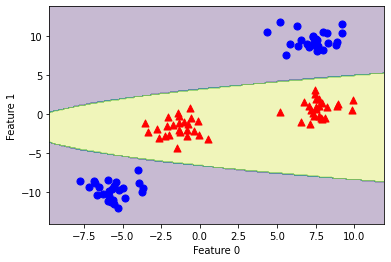

In [3]:
# %load ml02_svm_4blobs_nonlinear.py
import numpy as np
from sklearn.datasets import make_blobs
X, y  = make_blobs( centers=4, random_state=8)
y     = y%2
X_new = np.hstack([X, X[:,1:]**2])

import matplotlib.pyplot as pl
from mpl_toolkits.mplot3d import Axes3D, axes3d
fig    = pl.figure()
ax     = Axes3D( fig, elev=-160, azim=-22)
class0 = (X_new[y==0, 0], X_new[y==0, 1], X_new[y==0,2])
class1 = (X_new[y==1, 0], X_new[y==1, 1], X_new[y==1,2])
ax.scatter( *class0, c='b', marker='o', s=30)
ax.scatter( *class1, c='r', marker='^', s=30)
ax.set_xlabel('feature0')
ax.set_ylabel('feature1')
ax.set_zlabel('feature1 ** 2')
pl.savefig('fig/02_svm_4blobs_nonlinear.png')


from sklearn.svm import LinearSVC
lsvm3  = LinearSVC().fit( X_new, y)
coef   = lsvm3.coef_[0]
interc = lsvm3.intercept_

fig    = pl.figure()
ax     = Axes3D( fig, elev=-160, azim=-22)
class0 = (X_new[y==0, 0], X_new[y==0, 1], X_new[y==0,2])
class1 = (X_new[y==1, 0], X_new[y==1, 1], X_new[y==1,2])
ax.scatter( *class0, c='b', marker='o', s=30)
ax.scatter( *class1, c='r', marker='^', s=30)
ax.set_xlabel('feature0')
ax.set_ylabel('feature1')
ax.set_zlabel('feature1 ** 2')

xx = np.linspace( X_new[:,0].min()-2, X_new[:,0].max()+2, 200)
yy = np.linspace( X_new[:,1].min()-2, X_new[:,1].max()+2, 200)
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0]*XX + coef[1]*YY + interc)/-coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)

pl.savefig('fig/02_svm_4blobs_nonlinear_plane.png')


fig,ax  = pl.subplots(1,1)
data    = np.c_[ XX.ravel(), YY.ravel(), YY.ravel() **2]
dec     = lsvm3.predict(data)
dec     = dec.reshape( XX.shape )
ax.contourf( XX, YY, dec, level2=[dec.min(), 0, dec.max()], alpha=0.3 )
attrs0 = {'c':'b', 's':50, 'marker':'o', 'cmap': 'pl.get_cmap("viridis")'}
attrs1 = {'c':'r', 's':50, 'marker':'^', 'cmap': 'pl.get_cmap("viridis")'}
ax.scatter(X[:,0][y==0], X[:,1][y==0], **attrs0)
ax.scatter(X[:,0][y==1], X[:,1][y==1], **attrs1)
ax.set_xlabel('Feature 0')
ax.set_ylabel('Feature 1')
pl.savefig('fig/02_svm_4blobs_boundary.png')
pl.show()




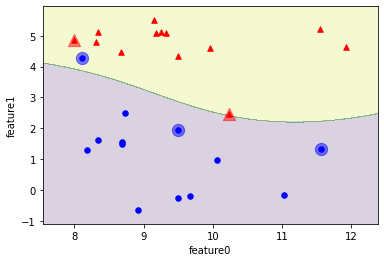

In [7]:
# %load ml02_svm_kernel.py
import data.gen_data as gd
X,y = gd.make_binary()

from sklearn.svm import SVC
svm    = SVC(kernel='rbf', C=10, gamma=0.1).fit(X,y)
sv     = svm.support_vectors_  # plot with larger marker size
dcoef  = svm.dual_coef_.ravel()# importance coefficients for sv
clabel = dcoef > 0             # sign gives the class labels for sv


def plot_boundary(classifier, X, ax):
    import numpy as np
    eps          = X.std()/8
    x_min, x_max = X[:,0].min() - eps, X[:,0].max() + eps
    y_min, y_max = X[:,1].min() - eps, X[:,1].max() + eps
    xx           = np.linspace(x_min, x_max, 1000)
    yy           = np.linspace(y_min, y_max, 1000)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    C_grid = classifier.predict(X_grid)
    C_grid = C_grid.reshape(X1.shape)
    ax.contourf(X1, X2,C_grid, alpha=0.2)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    
import matplotlib.pyplot as pl
fig,ax = pl.subplots(1,1)
plot_boundary(svm, X,ax)
ax.scatter( X[y==0,0], X[y==0,1], c='b', s=30, marker='o')
ax.scatter( X[y==1,0], X[y==1,1], c='r', s=30, marker='^')
ax.scatter( sv[~clabel, 0], sv[~clabel, 1], c='b', s=150, marker='o', alpha=0.5)
ax.scatter( sv[ clabel, 0], sv[ clabel, 1], c='r', s=150, marker='^', alpha=0.5)
ax.set_xlabel('feature0')
ax.set_ylabel('feature1')
pl.savefig('fig/02_svm_kernel.png')
pl.show()





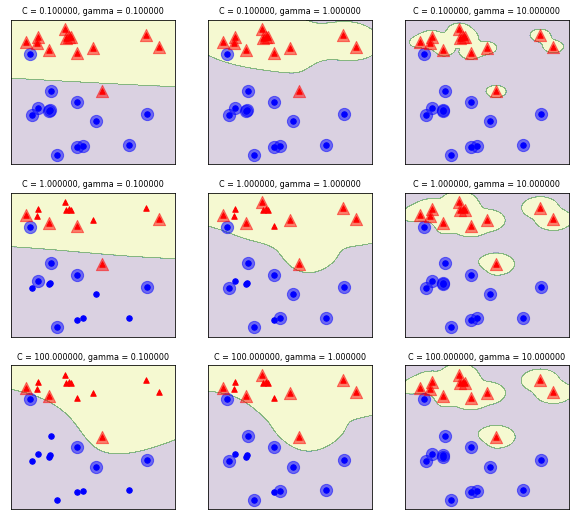

In [9]:
# %load ml02_svm_kernel_generalize.py
import numpy as np
import matplotlib.pyplot as pl
import data.gen_data as gd
X,y = gd.make_binary()

from sklearn.svm import SVC
svm    = SVC(kernel='rbf', C=10, gamma=0.1).fit(X,y)
sv     = svm.support_vectors_  # plot with larger marker size
dcoef  = svm.dual_coef_.ravel()# importance coefficients for sv
clabel = dcoef > 0             # sign gives the class labels for sv


def plot_boundary(classifier, X, ax):
    import numpy as np
    eps          = X.std()/8
    x_min, x_max = X[:,0].min() - eps, X[:,0].max() + eps
    y_min, y_max = X[:,1].min() - eps, X[:,1].max() + eps
    xx           = np.linspace(x_min, x_max, 1000)
    yy           = np.linspace(y_min, y_max, 1000)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    C_grid = classifier.predict(X_grid)
    C_grid = C_grid.reshape(X1.shape)
    ax.contourf(X1, X2,C_grid, alpha=0.2)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)


def plot_sv_boundary(svm, X, ax):
    sv     = svm.support_vectors_
    dcoef  = svm.dual_coef_.ravel()
    clabel = dcoef > 0
    plot_boundary(svm, X,ax)
    ax.scatter( X[y==0,0], X[y==0,1], c='b', s=30, marker='o')
    ax.scatter( X[y==1,0], X[y==1,1], c='r', s=30, marker='^')
    ax.scatter( sv[~clabel, 0], sv[~clabel, 1], c='b', s=150, marker='o', alpha=0.5)
    ax.scatter( sv[ clabel, 0], sv[ clabel, 1], c='r', s=150, marker='^', alpha=0.5)


fig,axes = pl.subplots(3,3, figsize=(10,9))
gamma, C = np.meshgrid([0.1, 1.0 ,10.0 ], [0.1, 1.0, 100])
params   = zip( gamma.ravel(), C.ravel() )
for (g,c), ax in zip( params, axes.ravel()):
    svm    = SVC(kernel='rbf', C=c, gamma=g).fit(X,y)
    plot_sv_boundary(svm, X, ax)
    ax.set_title( 'C = %4f, gamma = %4f'%(c,g), fontsize=8)
    ax.set_xticks([]); ax.set_yticks([])

pl.savefig('fig/02_svm_kernel_generalize.png')
pl.show()





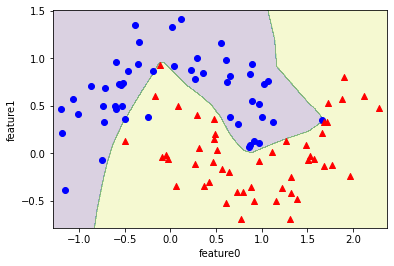

In [11]:
# %load ml02_mlp_moon.py
from sklearn.datasets import make_moons
X,y = make_moons( n_samples=100, noise=0.25, random_state=3)

from sklearn.model_selection import train_test_split as split
X_train, X_test, y_train, y_test = split(X,y, random_state=4, stratify=y)

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train,y_train)

def plot_boundary(classifier, X, ax):
    import numpy as np
    eps          = X.std()/8
    x_min, x_max = X[:,0].min() - eps, X[:,0].max() + eps
    y_min, y_max = X[:,1].min() - eps, X[:,1].max() + eps
    xx           = np.linspace(x_min, x_max, 1000)
    yy           = np.linspace(y_min, y_max, 1000)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    C_grid = classifier.predict(X_grid)
    C_grid = C_grid.reshape(X1.shape)
    ax.contourf(X1, X2,C_grid, alpha=0.2)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)


import matplotlib.pyplot as pl
fig,ax = pl.subplots(1,1)
plot_boundary(mlp, X, ax)
ax.scatter(X[y==0,0],X[y==0,1], c='b', marker='o')
ax.scatter(X[y==1,0],X[y==1,1], c='r', marker='^')
ax.set_xlabel('feature0')
ax.set_ylabel('feature1')
pl.savefig('fig/02_mlp_moons.png')
pl.show()


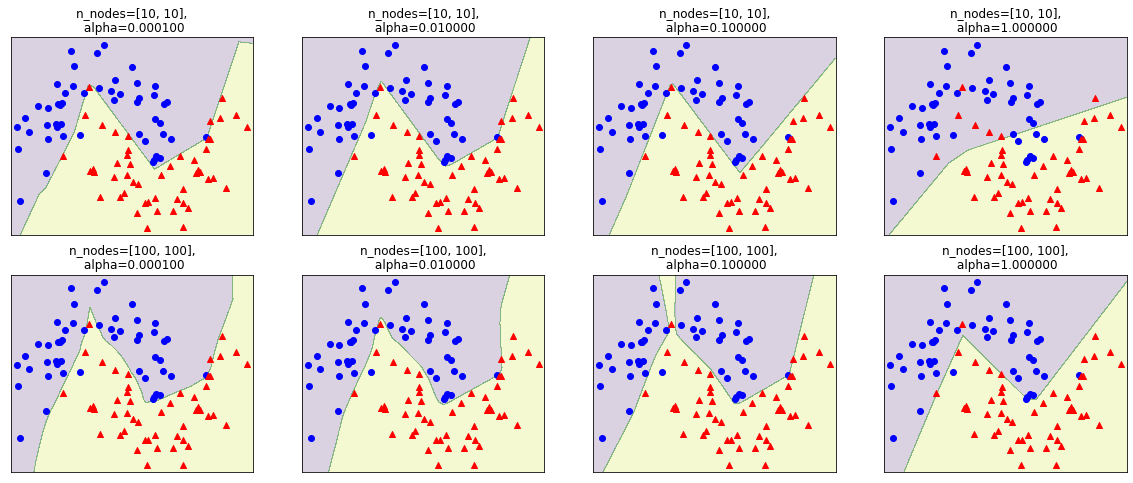

In [14]:
# %load ml02_mlp_moon_complexity.py
from sklearn.datasets import make_moons
X,y = make_moons( n_samples=100, noise=0.25, random_state=3)

from sklearn.model_selection import train_test_split as split
X_train, X_test, y_train, y_test = split(X,y, random_state=4, stratify=y)

def plot_boundary(classifier, X, ax):
    import numpy as np
    eps          = X.std()/8
    x_min, x_max = X[:,0].min() - eps, X[:,0].max() + eps
    y_min, y_max = X[:,1].min() - eps, X[:,1].max() + eps
    xx           = np.linspace(x_min, x_max, 1000)
    yy           = np.linspace(y_min, y_max, 1000)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    C_grid = classifier.predict(X_grid)
    C_grid = C_grid.reshape(X1.shape)
    ax.contourf(X1, X2,C_grid, alpha=0.2)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)


from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as pl
fig,axes = pl.subplots(2,4, figsize=(20,8))
for axx, n_hnodes in zip( axes, [10,100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hnodes,n_hnodes],
                            alpha=alpha)
        mlp.fit(X_train,y_train)
        plot_boundary(mlp, X, ax)
        ax.scatter(X[y==0,0],X[y==0,1], c='b', marker='o')
        ax.scatter(X[y==1,0],X[y==1,1], c='r', marker='^')
        ax.set_xticks([]); ax.set_yticks([])
        ax.set_title('n_nodes=[%d, %d],\n alpha=%f'%(n_hnodes,n_hnodes,alpha)); 
pl.savefig('fig/02_mlp_moons_complexity.png')
pl.show()


In [15]:
# Spot-checking ML algorithms
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split as split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

X, y = load_digits(return_X_y=True)
print(X.shape, y.shape)

(1797, 64) (1797,)


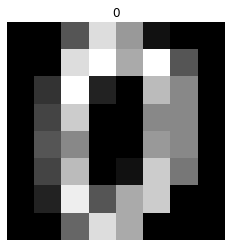

In [24]:
# To view one of the image
import matplotlib.pyplot as plt

img = X[0, :].reshape(8, 8)
plt.imshow(img, cmap='gray')
plt.axis(False)
plt.title(y[0])
plt.show()

In [16]:
X_train, X_test, y_train, y_test = split(X, y, stratify=y, random_state=42)

models = []
models.append(('knn', KNeighborsClassifier()))
models.append(('lgr', LogisticRegression()))
models.append(('dtc', DecisionTreeClassifier()))
models.append(('rfc', RandomForestClassifier()))
models.append(('gbc', GradientBoostingClassifier()))
models.append(('svc', SVC()))
models.append(('mlp', MLPClassifier()))


In [17]:
best_score = 0
best_model = None

for n, m in models:
    m.fit(X_train, y_train)
    score = m.score(X_test, y_test)
    print(f'Model: {n}, Score: {score}')
    if score > best_score:
        best_score = score
        best_model = m
        
print(f'Best model: {best_model}, best score: {best_score}')

Model: knn, Score: 0.9844444444444445
Model: lgr, Score: 0.9622222222222222
Model: dtc, Score: 0.8222222222222222
Model: rfc, Score: 0.9644444444444444
Model: gbc, Score: 0.9555555555555556
Model: svc, Score: 0.9911111111111112
Model: mlp, Score: 0.9733333333333334
Best model: SVC(), best score: 0.9911111111111112


In [18]:
# Save the model using joblib dump
from joblib import dump
dump(best_model, 'best_model.job')

['best_model.job']

In [19]:
# load the model using joblib load
from joblib import load
my_model = load('best_model.job')

print(my_model.score(X_test, y_test))

0.9911111111111112


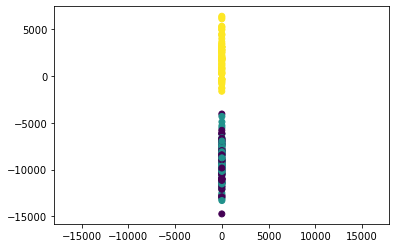

0.6933333333333334


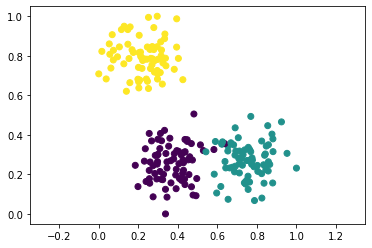

0.9866666666666667


In [26]:
# %load https://pastebin.com/raw/jJvTCFd9
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

df = read_csv('https://bit.ly/2Ql5WEg')
X1 = df.iloc[:, :-1].values  # df.values[:, :-1]
y1 = df.iloc[:, -1].values  # df.values[:, -1]
X1_train, X1_test, y1_train, y1_test = split(X1, y1, stratify=y1, random_state=41)

xx = X1_train[:, 0]
yy = X1_train[:, 1]
plt.scatter(xx, yy, c=y1_train)
plt.axis('equal')
plt.show()

knn1 = KNeighborsClassifier().fit(X1_train, y1_train)
print(knn1.score(X1_test, y1_test))

scl = MinMaxScaler()
X2_train = scl.fit_transform(X1_train)
X2_test = scl.transform(X1_test)

xx = X2_train[:, 0]
yy = X2_train[:, 1]
plt.scatter(xx, yy, c=y1_train)
plt.axis('equal')
plt.show()

knn2 = KNeighborsClassifier().fit(X2_train, y1_train)
print(knn2.score(X2_test, y1_test))

In [28]:
# %load ml03_categorical.py
import pandas as pd
df = pd.read_csv('data/adult.csv', header=None, index_col=False,
                 names=['age', 'workclass', 'fnlwgt', 'education',
                        'education_num', 'maritial_status', 'occupation',
                        'relationshi', 'race', 'gender','capital_gain',
                        'capital_loss','hours_per_week','native_country',
                        'income'])
df = df[['age','workclass','education','gender','hours_per_week',
         'occupation','income']]
print(df.head())
print(df.occupation.value_counts())

df2 = df[['occupation','gender', 'income']]
df2 = pd.get_dummies(df2)
print(df2.shape)      # (32561,17)
print(df2.columns)

X = df2.loc[:, 'occupation_ ?':'gender_ Male']
X = X.values
y = df2['income_ >50K']
y = y.values

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split as split
X_train, X_test, y_train, y_test = split(X,y, random_state=0)
logreg = LogisticRegression().fit(X_train, y_train)
print(logreg.score(X_test, y_test))             # 0.776808746

# Numbers as categorical data
df3  = pd.DataFrame({'checkbox':[0, 1, 0, 2],
                    'color':['white','white','blue','black']})
_df3 = pd.get_dummies(df3)
print(_df3.columns)

df3['checkbox'] = df3['checkbox'].astype(str)
_df3 = pd.get_dummies(df3)
print(_df3.columns)



   age          workclass   education   gender  hours_per_week  \
0   39          State-gov   Bachelors     Male              40   
1   50   Self-emp-not-inc   Bachelors     Male              13   
2   38            Private     HS-grad     Male              40   
3   53            Private        11th     Male              40   
4   28            Private   Bachelors   Female              40   

           occupation  income  
0        Adm-clerical   <=50K  
1     Exec-managerial   <=50K  
2   Handlers-cleaners   <=50K  
3   Handlers-cleaners   <=50K  
4      Prof-specialty   <=50K  
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: 

In [31]:
# %load ml03_categorical_exercise.py
# Handling of missing data and converting categorical features to numerical features
import pandas as pd
df = pd.DataFrame({'age': [17, 23, 'x', 38, 54, 67, 32],
                  'size': ['XS', 'M', 'L', 'XL', 'S', 'L', 'M'],
                  'gender':['M', 'F', 'f', 'M', 'M', 'F', 'F']})
print(df)
size_mapping = {'XS': 1, 'S': 2, 'M': 3, 'L': 4, 'XL': 5}

  age size gender
0  17   XS      M
1  23    M      F
2   x    L      f
3  38   XL      M
4  54    S      M
5  67    L      F
6  32    M      F


In [32]:
print(df.info())
df.replace({'x': None}, inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     7 non-null      object
 1   size    7 non-null      object
 2   gender  7 non-null      object
dtypes: object(3)
memory usage: 296.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     6 non-null      float64
 1   size    7 non-null      object 
 2   gender  7 non-null      object 
dtypes: float64(1), object(2)
memory usage: 296.0+ bytes
None


In [33]:
df['size'] = df['size'].map(size_mapping)
df

,age,size,gender
0,17.0,1,M
1,23.0,3,F
2,NaN,4,f
3,38.0,5,M
4,54.0,2,M
5,67.0,4,F
6,32.0,3,F


In [34]:
df1 = pd.get_dummies(df)
df1

,age,size,gender_F,gender_M,gender_f
0,17.0,1,0,1,0
1,23.0,3,1,0,0
2,NaN,4,0,0,1
3,38.0,5,0,1,0
4,54.0,2,0,1,0
5,67.0,4,1,0,0
6,32.0,3,1,0,0


In [35]:
df['gender'] = df['gender'].str.upper()
df

,age,size,gender
0,17.0,1,M
1,23.0,3,F
2,NaN,4,F
3,38.0,5,M
4,54.0,2,M
5,67.0,4,F
6,32.0,3,F


In [36]:
df2 = pd.get_dummies(df)
df2

,age,size,gender_F,gender_M
0,17.0,1,0,1
1,23.0,3,1,0
2,NaN,4,1,0
3,38.0,5,0,1
4,54.0,2,0,1
5,67.0,4,1,0
6,32.0,3,1,0


In [37]:
# df2.dropna() #  to drop the row with missing data
df2['age'] = df2['age'].fillna(df2['age'].median())
df2

,age,size,gender_F,gender_M
0,17.0,1,0,1
1,23.0,3,1,0
2,35.0,4,1,0
3,38.0,5,0,1
4,54.0,2,0,1
5,67.0,4,1,0
6,32.0,3,1,0


(284, 80)
(284, 40)


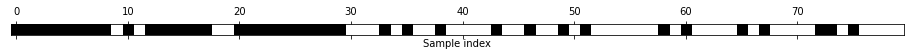

In [53]:
# %load ml03_unvariate.py
import numpy as np
import matplotlib.pyplot as pl
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split as split

cancer = load_breast_cancer()
rng  = np.random.RandomState(42)
rv   = rng.normal( size=(len(cancer.data),50) )
X_rv = np.hstack([cancer.data, rv])

X_train, X_test, y_train, y_test = split(X_rv, cancer.target, 
                                         random_state=0, test_size=0.5)

from sklearn.feature_selection import SelectPercentile
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)
print(X_train.shape)             # (284,80)
print(X_train_selected.shape)    # (284,40)

mask = select.get_support()
pl.matshow(mask.reshape(1,-1), cmap='gray_r')
pl.xlabel('Sample index')
pl.yticks([])
pl.savefig('fig/03_univariate1.png')

pl.show()

(284, 80)
(284, 40)


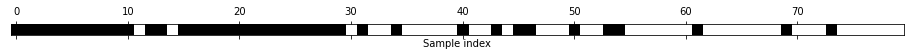

In [55]:
# %load ml03_model_based_selection.py
import numpy as np
import matplotlib.pyplot as pl
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split as split

cancer = load_breast_cancer()
rng  = np.random.RandomState(42)
rv   = rng.normal( size=(len(cancer.data),50) )
X_rv = np.hstack([cancer.data, rv])

X_train, X_test, y_train, y_test = split(X_rv, cancer.target, 
                                         random_state=0, test_size=0.5)

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(RandomForestClassifier(n_estimators=100, 
                                                random_state=42), 
                         threshold='median')
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)
print(X_train.shape)             # (284,80)
print(X_train_selected.shape)    # (284,40)

mask = select.get_support()
pl.matshow(mask.reshape(1,-1), cmap='gray_r')
pl.xlabel('Sample index')
pl.yticks([])
pl.savefig('fig/03_model_based_selection.png')

pl.show()

(284, 80)
(284, 40)


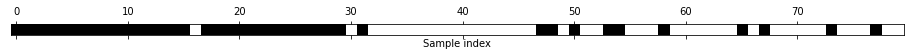

In [57]:
# %load ml03_iterative_feature_selection.py
import numpy as np
import matplotlib.pyplot as pl
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split as split

cancer = load_breast_cancer()
rng  = np.random.RandomState(42)
rv   = rng.normal( size=(len(cancer.data),50) )
X_rv = np.hstack([cancer.data, rv])

X_train, X_test, y_train, y_test = split(X_rv, cancer.target, 
                                         random_state=0, test_size=0.5)

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), 
             n_features_to_select=40)                         
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)
print(X_train.shape)             # (284,80)
print(X_train_selected.shape)    # (284,40)

mask = select.get_support()
pl.matshow(mask.reshape(1,-1), cmap='gray_r')
pl.xlabel('Sample index')
pl.yticks([])
pl.savefig('fig/03_iterative_feature_selection.png')

pl.show()

In [59]:
# %load ml03_cv_train_test.py
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LogisticRegression

X,y = make_blobs(random_state=0)
X_train, X_test, y_train, y_test = split(X, y, random_state=0)
lr = LogisticRegression().fit(X_train, y_train)
print( lr.score(X_train,y_train) )   # 0.92
print( lr.score(X_test,y_test)   )   # 0.88

from sklearn.model_selection import cross_val_score
lr = LogisticRegression()
scores = cross_val_score(lr, X, y, cv=5)
print(scores) #[ 0.9047619   0.85714286  0.9047619   0.89473684  0.88888889]
print(scores.mean())   #0.890058479532

from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(lr, X,y, cv=loo)
print(scores.mean())   # 0.89

from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(test_size=0.5, train_size=0.5, n_splits=10)
scores = cross_val_score(lr, X,y, cv=ss)
print(scores.mean())   # 0.898

from sklearn.model_selection import GroupKFold
X,y = make_blobs(n_samples=12, random_state=0)
groups = [0,0,0,1,1,1,1,2,2,3,3,3]
scores = cross_val_score(lr, X,y, groups, cv=GroupKFold(n_splits=3))
print(scores)         # [ 0.75, 0.8,   0.667]


0.9066666666666666
0.88
[0.9  0.9  0.9  0.8  0.95]
0.89
0.89
0.9059999999999999
[0.75       0.6        0.66666667]


In [61]:
# %load ml03_grid_search.py
from sklearn.model_selection import train_test_split as split
from sklearn.datasets import load_iris
from sklearn.svm import SVC
iris = load_iris()

# Grid search implementation
X_train, X_test, y_train, y_test = split(iris.data, iris.target, 
                                         random_state=0)
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1., 10, 100]:
    for C in [0.001, 0.01, 0.1, 1., 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_test, y_test)
        if score > best_score:
            best_score =score
            param = {'gamma':gamma, 'C':C}
print(best_score)  # 0.973684210526
print(param)       # {'gamma': 0.001, 'C': 100}

# Grid search with train-validation-test split
X_trainval, X_test, y_trainval, y_test = split(iris.data, iris.target, 
                                               random_state=0)
X_train, X_val, y_train, y_val = split(X_trainval, y_trainval, 
                                               random_state=0)
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1., 10, 100]:
    for C in [0.001, 0.01, 0.1, 1., 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_val, y_val)
        if score > best_score:
            best_score =score
            param = {'gamma':gamma, 'C':C}

svm = SVC(**param)
svm.fit(X_trainval, y_trainval)
score = svm.score(X_test, y_test)

print(param)  # {'gamma': 0.001, 'C': 100}
print(score)  # 0.973684210526

# Grid search with cross-validation
from sklearn.model_selection import cross_val_score
X_trainval, X_test, y_trainval, y_test = split(iris.data, iris.target, 
                                               random_state=0)
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1., 10, 100]:
    for C in [0.001, 0.01, 0.1, 1., 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        score = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        score = score.mean()
        if score > best_score:
            best_score =score
            param = {'gamma':gamma, 'C':C}

svm = SVC(**param)
svm.fit(X_trainval, y_trainval)
score = svm.score(X_test, y_test)

print(param)  # {'gamma': 0.001, 'C': 100}
print(score)  # 0.973684210526


0.9736842105263158
{'gamma': 0.001, 'C': 100}
{'gamma': 0.001, 'C': 100}
0.9736842105263158
{'gamma': 0.1, 'C': 10}
0.9736842105263158


In [64]:
# Using sklearn GridSearchCV for hyperparameters tuning
from sklearn.model_selection import GridSearchCV

param = {}
param['gamma'] = [0.001, 0.01, 0.1, 1., 10, 100]
param['C'] = [0.001, 0.01, 0.1, 1., 10, 100]
gs = GridSearchCV(SVC(), param, cv=5, n_jobs=-1, verbose=1).fit(X_trainval, y_trainval)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [66]:
print(gs.best_params_, gs.best_score_)

{'C': 10, 'gamma': 0.1} 0.9731225296442687


In [67]:
svm = SVC(**gs.best_params_).fit(X_trainval, y_trainval)
print(svm.score(X_test, y_test))

0.9736842105263158


[['TN', 'FN']
['FP', 'TP']]
[[1147  103]
 [  96 1154]]


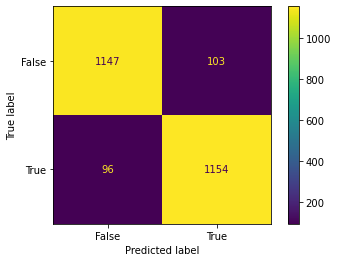

              precision    recall  f1-score   support

       False       0.92      0.92      0.92      1250
        True       0.92      0.92      0.92      1250

    accuracy                           0.92      2500
   macro avg       0.92      0.92      0.92      2500
weighted avg       0.92      0.92      0.92      2500



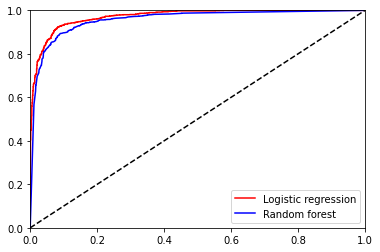

In [69]:
# %load ml03_confusion.py
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from pandas import read_csv

df = read_csv('data/genders_heights_weights.csv')
X = df.values[:, 1:]
y = df['Gender'] == 'Female'
# X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = split(X, y, stratify=y, random_state=42)

lr = LogisticRegression(C=0.1).fit(X_train, y_train)
y_pred_logistic = lr.predict(X_test)

rf = RandomForestClassifier().fit(X_train, y_train)
y_pred_forest = rf.predict(X_test)

from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt
print("[['TN', 'FN']\n['FP', 'TP']]")
print(confusion_matrix(y_test, y_pred_logistic))
plot_confusion_matrix(lr, X_test, y_test)
plt.show()
  
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_logistic))

from sklearn.metrics import roc_curve, precision_recall_curve, plot_roc_curve
fpr1, tpr1, thresh1 = roc_curve(y_test, lr.decision_function(X_test))
fpr2, tpr2, thresh2 = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
plt.plot(fpr1, tpr1, 'r', label='Logistic regression')
plt.plot(fpr2, tpr2, 'b', label='Random forest')
plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc='best')
plt.margins(x=0, y=0)
plt.show()


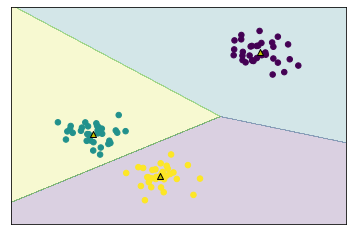

In [71]:
# %load ml04_kmeans_boundary.py
import numpy as np
import matplotlib.pyplot as pl
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

def plot_boundary(classifier, X, ax):
    x_min, x_max = X[:,0].min() - X.std()/2, X[:,0].max() + X.std()/2
    y_min, y_max = X[:,1].min() - X.std()/2, X[:,1].max() + X.std()/2
    xx           = np.linspace(x_min, x_max, 1000)
    yy           = np.linspace(y_min, y_max, 1000)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    C_grid = classifier.predict(X_grid)
    C_grid = C_grid.reshape(X1.shape)
    ax.contourf(X1, X2,C_grid, alpha=0.2)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    ax.scatter(X[:,0], X[:,1], c=y,s=30, cmap=pl.get_cmap('viridis'))


X, y = make_blobs(random_state=1)
km = KMeans(n_clusters=3).fit(X)

fig,ax = pl.subplots(1,1)
plot_boundary(km, X, ax)
centers = km.cluster_centers_
_center = {'marker':'^', 'lw':1.0, 'edgecolor':'k', 'c':'y'}
ax.scatter(centers[:,0],centers[:,1], **_center)
ax.set_xticks([])
ax.set_yticks([])
pl.savefig('fig/04_kmeans_boundary.png')
pl.show()




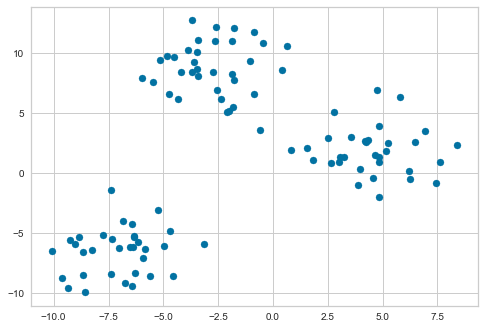

In [82]:
# Using elbow method to find the optimum number of clusters
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(centers=3, cluster_std=2, random_state=42)
plt.scatter(X[:, 0], X[:, 1])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

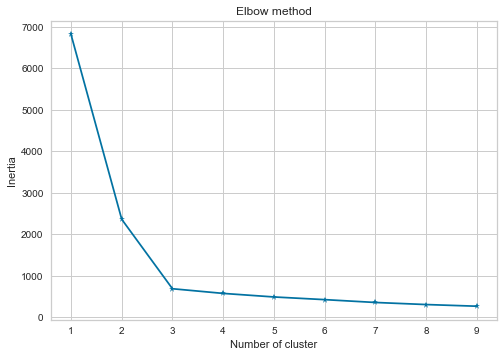

In [83]:
inertias = []
for k in range(1, 10):
    km = KMeans(n_clusters=k).fit(X)
    inertias.append(km.inertia_)
    
plt.plot(range(1, 10), inertias, 'b*-')
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
plt.title('Elbow method')
plt.show()

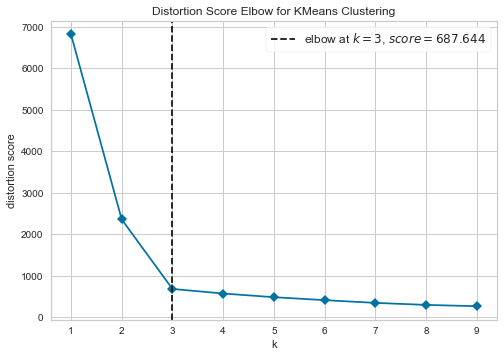

3


In [87]:
from yellowbrick.cluster import KElbow
elbow = KElbow(KMeans(), k=(1, 10), timings=False)
elbow.fit(X)
elbow.show()

print(elbow.elbow_value_)

<function matplotlib.pyplot.show(close=None, block=None)>

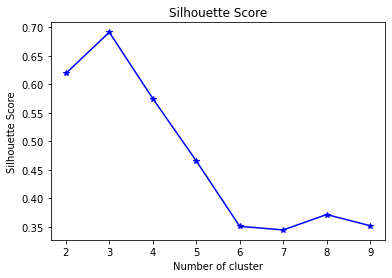

In [75]:
# Using Silhouette score to find the optimum number of clusters
from sklearn.metrics import silhouette_score
sscores = []
for k in range(2, 10):
    km = KMeans(n_clusters=k).fit(X)
    sscores.append(silhouette_score(X, km.labels_))

plt.plot(range(2, 10), sscores, 'b*-')
plt.xlabel('Number of cluster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show

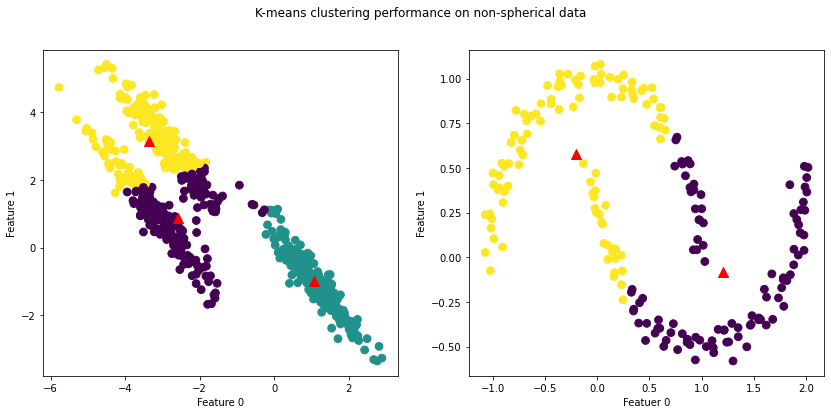

In [77]:
# %load ml04_kmeans_nonspherical.py
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs, make_moons
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# generate some random cluster data
X, y = make_blobs(n_samples=600, random_state=170)
rng = np.random.RandomState(74)

# transform the data tot be strenched
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

# cluster the data into 3 clusters
km = KMeans(n_clusters=3).fit(X)

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# plot the cluster assignments and cluster centres
ax[0].scatter(X[:, 0], X[:, 1], c=km.labels_, s=60)
ax[0].scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
            c='red', marker='^', s=100)
ax[0].set_xlabel('Feature 0')
ax[0].set_ylabel('Feature 1')

# generate synthetic two moons data
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
scl = StandardScaler()
Xs = scl.fit_transform(X)

# cluster the data into two clusters
km = KMeans(n_clusters=2).fit(X)

# plot the cluster ssignments and cluster centres
ax[1].scatter(X[:, 0], X[:, 1], c=km.labels_, s=60)
ax[1].scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
            c='red', marker='^', s=100)
ax[1].set_xlabel('Featuer 0')
ax[1].set_ylabel('Feature 1')

fig.suptitle('K-means clustering performance on non-spherical data')
plt.savefig('fig/04_kmeans_nonspherical.png')
plt.show()

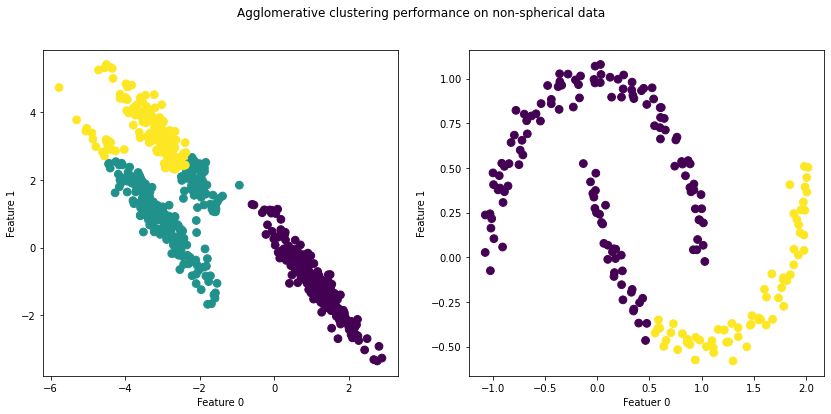

In [79]:
# %load ml04_agglomerative_nonspherical.py
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs, make_moons
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# generate some random cluster data
X, y = make_blobs(n_samples=600, random_state=170)
rng = np.random.RandomState(74)

# transform the data tot be strenched
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

# cluster the data into 3 clusters
ag = AgglomerativeClustering(n_clusters=3).fit(X)

# create subplots with 1 row & 2 columns
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# plot the cluster assignments and cluster centres
ax[0].scatter(X[:, 0], X[:, 1], c=ag.labels_, s=60)
ax[0].set_xlabel('Feature 0')
ax[0].set_ylabel('Feature 1')

# generate synthetic two moons data
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
scl = StandardScaler()
Xs = scl.fit_transform(X)

# cluster the data into two clusters
ag = AgglomerativeClustering(n_clusters=2).fit(X)

# plot the cluster ssignments and cluster centres
ax[1].scatter(X[:, 0], X[:, 1], c=ag.labels_, s=60)
ax[1].set_xlabel('Featuer 0')
ax[1].set_ylabel('Feature 1')

fig.suptitle('Agglomerative clustering performance on non-spherical data')
plt.savefig('fig/04_agglomerative_nonspherical.png')
plt.show()

Number of noise points: 2


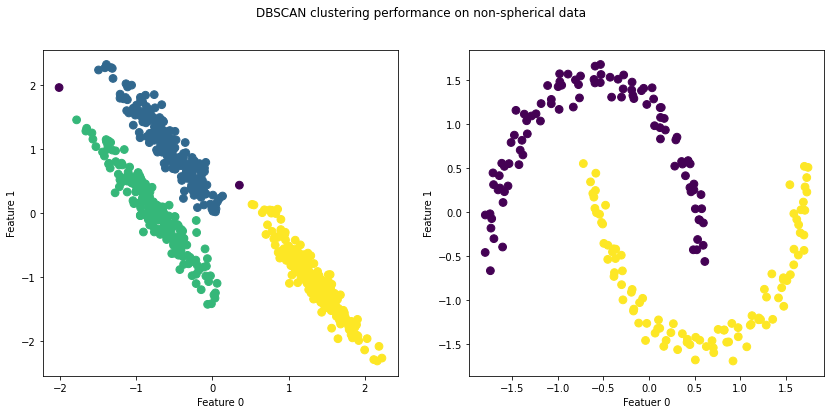

In [81]:
# %load ml04_dbscan_nonspherical.py
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs, make_moons
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# generate some random cluster data
X, y = make_blobs(n_samples=600, random_state=170)
rng = np.random.RandomState(74)

# transform the data tot be strenched
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)
scl = StandardScaler()
Xs = scl.fit_transform(X)

# cluster the data into 3 clusters
ds = DBSCAN(eps=0.2, min_samples=4).fit(Xs)
print(f'Number of noise points: {sum(ds.labels_ == -1)}')

# create subplots with 1 row & 2 columns
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# plot the cluster assignments and cluster centres
ax[0].scatter(Xs[:, 0], Xs[:, 1], c=ds.labels_, s=60)
ax[0].set_xlabel('Feature 0')
ax[0].set_ylabel('Feature 1')

# generate synthetic two moons data
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
scl = StandardScaler()
Xs = scl.fit_transform(X)

# cluster the data into two clusters
ds = DBSCAN().fit(Xs)

# plot the cluster ssignments and cluster centres
ax[1].scatter(Xs[:, 0], Xs[:, 1], c=ds.labels_, s=60)
ax[1].set_xlabel('Featuer 0')
ax[1].set_ylabel('Feature 1')

fig.suptitle('DBSCAN clustering performance on non-spherical data')
plt.savefig('fig/04_dbscan_nonspherical.png')
plt.show()

In [ ]:
%load ml04_pca_faces.py

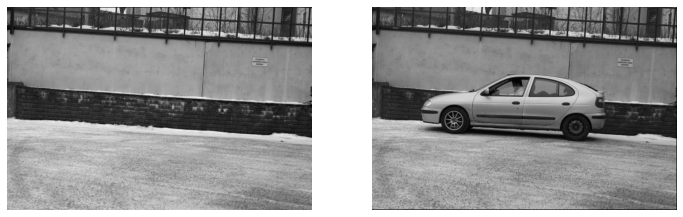

(400, 600) (400, 600)
(21, 240000)


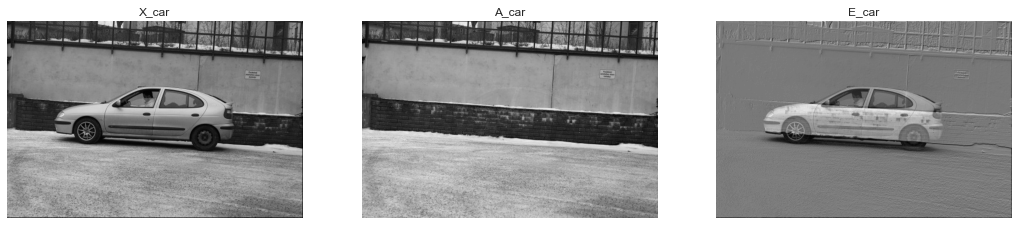

In [89]:
# %load ml04_truncated_SVD.py
import numpy as np
import matplotlib.pyplot as plt

# Use opencv
# import cv2
# bg = cv2.imread('data/background.png')
# bg = cv2.cvtColor(bg, cv2.COLOR_BGR2GRAY)
# car = cv2.imread('data/background_with_car.png')
# car = cv2.cvtColor(car, cv2.COLOR_BGR2GRAY)
# bg_norm = np.zeros(bg.shape)
# bg_norm = cv2.normalize(bg,bg_norm,0,255,norm_type=cv2.NORM_MINMAX)
# car_norm = np.zeros(car.shape)
# car_norm = cv2.normalize(car,car_norm,0,255,norm_type=cv2.NORM_MINMAX)

# Use PIL
from PIL import Image
def image_normalize(disp):
    _min = np.amin(disp)
    _max = np.amax(disp)
    disp_norm = (disp - _min) * 255.0 / (_max - _min)
    disp_norm = np.uint8(disp_norm)
    return disp_norm 
bg = Image.open('data/background.png').convert('L')
car = Image.open('data/background_with_car.png').convert('L')
bg = np.asarray(bg, dtype=np.uint8)
car = np.asarray(car, dtype=np.uint8)

bg_norm = image_normalize(bg)
car_norm = image_normalize(car)

fig,ax = plt.subplots(1,2, figsize=(12,4))
ax[0].imshow(bg, cmap='gray')
ax[0].axis(False)
ax[1].imshow(car, cmap='gray')
ax[1].axis(False)
plt.show()

print(car_norm.shape, bg_norm.shape)

# Merge 20 copies of background and 1 copy of car into a matrix
X = [bg_norm.ravel() for i in range(20)]
X.append(car_norm.ravel())
X = np.array(X)
print(X.shape)

U,S,VT = np.linalg.svd(X, full_matrices=False)

# Reconstruct the matrix with only one SVD component
# A is the re-constructed matrix for X, this retains most information, ie the background
# E is the difference between extact X and approximation A, this give the car
k = 1
A = U[:,:k] @ np.diag(S[:k]) @ VT[:k, :]
E = X-A

# Extract the last row
X_car = X[-1,:].reshape(car.shape)
A_car = A[-1,:].reshape(car.shape)
E_car = E[-1,:].reshape(car.shape)

fig,ax = plt.subplots(1,3, figsize=(18,4))
for i,t in zip([0,1,2], ['X_car', 'A_car', 'E_car']):
    ax[i].imshow(eval(t), cmap='gray')
    ax[i].axis(False)
    ax[i].set_title(t)
plt.show()
